In [9]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
bitstamp_path = Path("../Challenge3_BitCoin_Arbitrage/Resources/bitstamp.csv")
coinbase_path = Path("../Challenge3_BitCoin_Arbitrage/Resources/coinbase.csv")

In [27]:
# Bitstamp and Coinbase Dataframe creation 

bitstamp_df = pd.read_csv(
    bitstamp_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)
coinbase_df = pd.read_csv(
    coinbase_path, 
    index_col="Timestamp", 
    infer_datetime_format=True, 
    parse_dates=True
)

bitstamp_df.rename(columns={'Close':'btstmp_Close'}, inplace=True)
coinbase_df.rename(columns={'Close':'coinbs_Close'}, inplace=True)

,Open,High,Low,btstmp_Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


In [44]:
# Dropping NaN's
bitstamp_df = bitstamp_df.dropna().copy()
coinbase_df = coinbase_df.dropna().copy()

# Dropping Duplicates
coinbase_df = coinbase_df.drop_duplicates(keep=False)
bitstamp_df = bitstamp_df.drop_duplicates(keep=False)

# Dropping the dollar sign and setting Close columnb to float
bitstamp_df["btstmp_Close"] = bitstamp_df["btstmp_Close"].str.replace("$", "",regex=False).astype("float")
coinbase_df["coinbs_Close"] = coinbase_df["coinbs_Close"].str.replace("$", "",regex=False).astype("float")



In [45]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp_df.loc[:,'btstmp_Close']
coinbase_sliced = coinbase_df.loc[:,'coinbs_Close']

close_prices_df = pd.concat([coinbase_sliced, bitstamp_sliced], axis=1)
close_prices_df.dtypes

#close_prices_df['coinbs_Close'].astype("float")
#close_prices_df['btstmp_Close'].astype("float")


coinbs_Close    float64
btstmp_Close    float64
dtype: object

In [52]:
close_prices_df['arbtrg_spread'] = (close_prices_df['coinbs_Close'] - close_prices_df['btstmp_Close'])
print(close_prices_df.head(30))

                     coinbs_Close  btstmp_Close  arbtrg_spread
Timestamp                                                     
2018-01-01 00:00:00      13608.49      13646.48         -37.99
2018-01-01 00:01:00      13601.66      13658.75         -57.09
2018-01-01 00:02:00      13580.00      13610.22         -30.22
2018-01-01 00:03:00      13550.34      13639.09         -88.75
2018-01-01 00:04:00      13583.44      13620.00         -36.56
2018-01-01 00:05:00      13564.35      13610.00         -45.65
2018-01-01 00:06:00      13539.00      13600.56         -61.56
2018-01-01 00:07:00      13511.02      13580.00         -68.98
2018-01-01 00:08:00      13528.52      13579.00         -50.48
2018-01-01 00:09:00      13522.00      13565.00         -43.00
2018-01-01 00:10:00      13500.72      13550.00         -49.28
2018-01-01 00:11:00      13489.92      13505.52         -15.60
2018-01-01 00:12:00      13489.91      13535.79         -45.88
2018-01-01 00:13:00      13489.91      13545.92        

In [87]:

filtered_prices_df = close_prices_df.loc[close_prices_df['arbtrg_spread'] > 0]
#filtered_prices_df.shape
#filtered_prices_df.head(30)

choice_prices = filtered_prices_df.sort_values(['arbtrg_spread'], ascending=False).groupby('arbtrg_spread').head(100)
#choice_prices = filtered_prices_df.groupby('arbtrg_spread').value.nlargest(30).reset_index()
display(choice_prices.iloc[5:10])
##data.iloc[0:10] # first five rows of dataframe

,coinbs_Close,btstmp_Close,arbtrg_spread
Timestamp,,,
2018-01-16 19:12:00,11950.00,11599.78,350.22
2018-01-16 17:47:00,11350.00,11020.27,329.73
2018-01-01 23:26:00,13319.00,12999.01,319.99
2018-01-16 18:56:00,11649.99,11346.89,303.10
2018-01-01 23:25:00,13375.89,13082.00,293.89


(array([4.455e+04, 2.803e+03, 2.090e+02, 3.200e+01, 8.000e+00, 3.000e+00,
        2.000e+00, 1.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00000e-02, 6.06890e+01, 1.21368e+02, 1.82047e+02, 2.42726e+02,
        3.03405e+02, 3.64084e+02, 4.24763e+02, 4.85442e+02, 5.46121e+02,
        6.06800e+02]),
 <BarContainer object of 10 artists>)

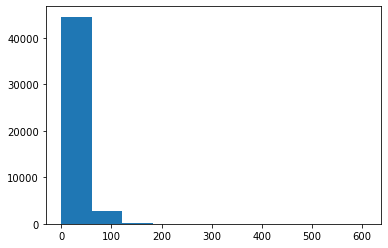

In [89]:
#plt.hist(DataFrame[‘column_name’])
plt.hist(choice_prices['arbtrg_spread'])

I wanted to see a distrubtion of the values in the choice_price dataframe  over the time frame therein. I wanted to show graphically that there were more days in the earlier part of q1 2018 with an arbtrg_fee > 0. I expected it to  decrease over time. 